In [1]:
with open ("benchmark_cc_5a_20iters_5000numsteps.txt", 'r') as f:
    lines = f.read()
lines=lines.split("\n")

In [2]:
elapsed_bench=[]
for line in lines:
    #replica_id, iter_id = line.split("_")[0:2]
    tmp=line.split()
    elapsed_bench.append(1./float(tmp[7]))

Avg 75.39 ns/day


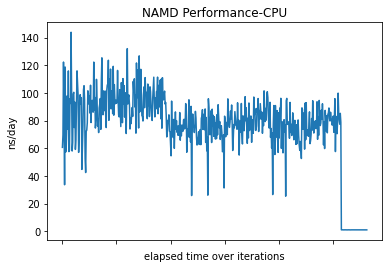

In [3]:
import pandas as pd
df = pd.DataFrame(elapsed_bench)
ax=df.plot(legend=False)
ax.set_ylabel('ns/day')
ax.set_xlabel('elapsed time over iterations')
#ax.set_xlabel('')
ax.set_xticklabels('')
ax.set_title('NAMD Performance-CPU')
print ("Avg {:.2f} ns/day".format(sum(elapsed_bench)/len(elapsed_bench)))

In [4]:
from glob import glob
import os

cuda_data = {}
elapsed_bench_all=[]
for fname in glob("mdff/*"):
    with open (fname, 'r') as f:
        lines = f.read()
    lines=lines.split("\n")
    elapsed_bench=[]
    for line in lines:
        #replica_id, iter_id = line.split("_")[0:2]
        tmp=line.split()
        if len(tmp) > 7:
            elapsed_bench.append(1./float(tmp[7]))
            elapsed_bench_all.append(1./float(tmp[7]))
    replica_name = ("replica " + fname.split('-')[3])[:-4]
    cuda_data[replica_name] = elapsed_bench
    

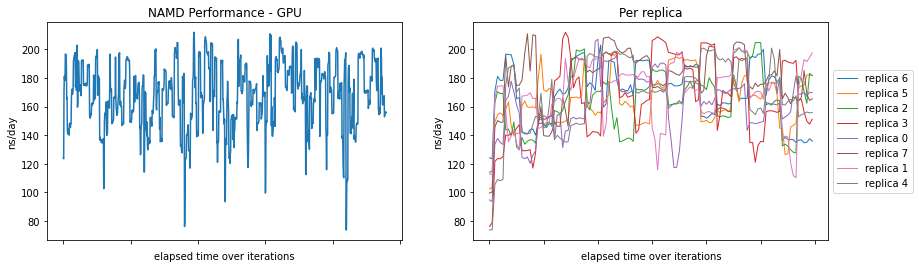

Avg 167.98 ns/day


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.DataFrame(cuda_data)

fig, ax = plt.subplots(1, 2, figsize=(14, 4), sharex=False, sharey=False)

idx=0

df_all = pd.DataFrame(elapsed_bench_all)
df_all.plot(legend=False, ax=ax[idx])
ax[idx].set_ylabel('ns/day')
ax[idx].set_xlabel('elapsed time over iterations')
#ax.set_xlabel('')
ax[idx].set_xticklabels('')
ax[idx].set_title('NAMD Performance - GPU')

idx+=1
df = pd.DataFrame(cuda_data)
df.plot(legend=True, ax=ax[idx], lw=1)
ax[idx].set_ylabel('ns/day')
ax[idx].set_xlabel('elapsed time over iterations')
#ax.set_xlabel('')
ax[idx].set_xticklabels('')
ax[idx].set_title('Per replica')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()
#plt.legend(bbox_to_anchor=(0, 1), loc='upper right', ncol=1)
fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
print ("Avg {:.2f} ns/day".format(sum(elapsed_bench_all)/len(elapsed_bench_all)))